# **NLP (Natural Language Processing) 분석**
**뉴스그룹 데이터 Set 분석**
1. 단어의 지식과 개념을 정리하는 작업으로 **Ontology** 같은 예들이 존재
1. 낮은 단계로는 **Tagging, POS(Part of Speech)** 이 있다
1. Python 라이브러리로 **NLTK, Gensim, TextBlob** 등이 있다

<br/>

## **1. NLP 개념 익히기**

**NLTK 에서 자연어 분석 작업**
1. **Tokenization**(토큰화) : 텍스트를 공백문자로 구분하여 조각을 나누는 작업 (Document --> Ngram)
1. **POS Tagging**(품사태깅) : **Konlpy, NLTK** 에 규격화 된 Tagger를 적용하거나, **POS_TAG**와 같은 함수를 활용
1. **NER** (개체명 인식) : **Named entity Recognition** 은 텍스트 문장에서 명사를 식별하는 작업이다
1. **Stemming** (어간추출) : 어간, 어근의 **원형으로** 되돌리는 작업
1. **Lemmatization**(표제어 원형 복원) : 어간 추출보다 좁은 의미로써 **단어를 유효한 결과로** 출력하는 작업

In [1]:
# 어간의 추출
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
porter_stemmer.stem('machines')

'machin'

In [2]:
# Token 의 원형을 복구한다
from nltk.stem import WordNetLemmatizer
lemmatization = WordNetLemmatizer()
lemmatization.lemmatize('machines')

'machine'

### **Gensim 에서의 자연어 분석 작업**
문장간 유사도 측정을 위해 2008년 시작된 모듈로써, 다양한 모델링이 가능하다
1. **Similarity Querying** (유사도 쿼리) : 주어긴 쿼리 객체와 유사한 객체를 검색
1. **Word vectorization** (단어 벡터화) : 단어의 동시출현 Feacture를 유지하면서 단어를 표현
1. **Distribution Computing** (분산 컴퓨팅) : 다수의 문서를 효과적으로 학습

### **Text Blob**
NLTK 기반의 라이브러리로 **맞춤법 확인 및 교정, 언어감지, 번역기능이** 추가

<br/>
## **2. newsgroups 데이터 보기**
20개의 **News Group을** 대상으로 **11,313 개의** 뉴스 데이터가 담겨있다
### **01 News Group 데이터 살펴보기**
> **fetch_20newsgroups()**

1. subset : 적제할 데이터를 정의한다
1. data_home : 파일을 저장할 폴더 ex) **~/scikit_learn_data**(초기값)
1. categories : 추출할 목록을 지정

In [3]:
# 뉴스 데이터를 가져온다 (약 14MB)
# 뉴스 그룹 0 ~ 19 (20개 목록)
from sklearn.datasets import fetch_20newsgroups
groups = fetch_20newsgroups(data_home='data/news/')
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
# groups Json 데이터 살펴보기
for key in groups.keys():
    print(key, ':', type(groups[key]))
groups.keys()

data : <class 'list'>
filenames : <class 'numpy.ndarray'>
target_names : <class 'list'>
target : <class 'numpy.ndarray'>
DESCR : <class 'str'>


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
# 뉴스그룹 Primary Key 값인 정수값 인코딩
# 정수들이 중복되지 않게 정리된 결과를 출력한다
import numpy as np
print(groups.target)
np.unique(groups.target)

[7 4 4 ... 3 1 8]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

### **02 개별 News 데이터 살펴보기**
0 번 뉴스의 정보를 확인하기

In [6]:
# 해당 뉴스의 내용 살펴보기
print("News Group 포함된 자료갯수: {:,} 개\n\n0번 샘플보기: \n{}".format(
    len(groups.data), groups.data[0]))

News Group 포함된 자료갯수: 11,314 개

0번 샘플보기: 
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [7]:
# 0번 뉴스의 해당 그룹 Category 확인
groups.target_names[groups.target[0]]

'rec.autos'

### **03 데이터 시각화**
1. Document를 분석하는 경우 **Bag of Words로써** (단어의 집합) 활용한다
1. **단어 모델링과** 어떠한 차이가 있는지를 확인해 본다
1. **총 20개 카테고리** 뉴스들을 Histogram으로 시각화 (비슷한 갯수로 모델이 분표)

/home/markbaum/Python/python/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


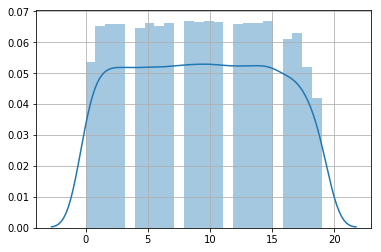

In [8]:
%matplotlib inline
# Seaborn 내부함수에 대한 FutureWarning이 출력
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 전체 뉴스그룹 데이터의 길이를 시각화 한다
# 전체적으로 11,316개가 비슷한 길이를 갖음을 확인할 수 있다
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(groups.target)
plt.grid()

### **04 Feacture Set을 활용하여 전체 Text 갯수를 확인한다**
1. **Sklearnd의 CountVectorizer를** 활용하여 **빈도상위 500**개 Token으로 Embadding
1. **위는 알파벳 갯수로써** 비교를 했기 때문에 비슷하게 나오는데
1. **단어 기준으로** Feacture Set을 생성하면 결과가 어떻게 되는지 확인해보자

> **CountVectorizer()** 의 파라미터 확인

1. **stop_words** : 불용어 목록을 활성화 한다  ex) **None(초기값), english, [a, the, of]**
1. **ngram_range** : 추출할 ngram 하한/ 상한선을 지정  ex) **(1,1)(초기값) (1,2) (2,2)**
1. **lowercase** : 소문자 변환 활성화 여부   ex) **True(초기값), False**
1. **max_feacture** : None 아니면 최대 token 갯수를 지정  ex) **None(초기값), 500**
1. **binary** : 바이너리 여부를 정의한다

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# 빈도상위 500개의 단어로만 추출한 결과를 분석
cv = CountVectorizer(stop_words="english", max_features=500)
transformed = cv.fit_transform(groups.data)
print(cv.get_feature_names()[:100]) 
# 빈도상위 100개의 Token을 출력한다 : 문장간 식별력이 낮은 숫자와 기호들이 포함

['00', '000', '0d', '0t', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '1d9', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '34u', '35', '40', '45', '50', '55', '80', '92', '93', '__', '___', 'a86', 'able', 'ac', 'access', 'actually', 'address', 'ago', 'agree', 'al', 'american', 'andrew', 'answer', 'anybody', 'apple', 'application', 'apr', 'april', 'area', 'argument', 'armenian', 'armenians', 'article', 'ask', 'asked', 'att', 'au', 'available', 'away', 'ax', 'b8f', 'bad', 'based', 'believe', 'berkeley', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'buy', 'ca', 'california', 'called', 'came', 'canada', 'car', 'card', 'care', 'case', 'cause']


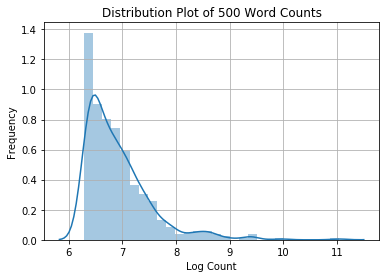

In [10]:
# 위에서 추출한 임베딩 데이터로 히스토그램을 보여준다
sns.distplot(np.log(transformed.toarray().sum(axis=0)))
plt.xlabel('Log Count')
plt.ylabel('Frequency')
plt.title('Distribution Plot of 500 Word Counts')
plt.grid(); plt.show()

<br/>

## **3. newsgroups 데이터 분석**
데이터를 전처리, 분석 과정을 단계별 진행한다 (분석에 용이한 텍스트로 재선별)
### **01 데이터 전처리 (식별력이 높은 자료들만 추출한다)**
1. 식별에 용이한 숫자 기호들은 제외한, 순수한 문자 데이터만 선별한다
1. 단어별 일치도를 높이기 위해서 **표제어 복원을** 진행
1. 문자중에도 Stopword, name 같이 식별력이 낮은 내용들은 제거한다

```python
# 실행 중 nltk 오류시
import nltk
nltk.download('names')
```

In [11]:
# 아래에서 사용하는 알파벳 판단함수
'names'.isalpha()

True

In [12]:
%%time
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

# 영문 제시어만 추출한다
def letters_only(astr):
    for c in astr:
        if not c.isalpha(): return False
    return True

# 추출한 데이터 Token을 하나씩 표제어복원을 진행한다
all_names  = set(names.words())
lemmatizer = WordNetLemmatizer()
cleaned    = [' '.join([lemmatizer.lemmatize(word.lower())
                        for word in post.split()
                        if letters_only(word) and word not in all_names])   
              for post in groups.data]
    
# cv = CountVectorizer(stop_words="english", max_features=500)
transformed = cv.fit_transform(cleaned)
print(cv.get_feature_names()[:10])
len(names.words())

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago']
CPU times: user 12.6 s, sys: 30.8 ms, total: 12.6 s
Wall time: 12.6 s


### **02 K-means 를 활용한 클러스터링**
1. **(transformed)** : 위 전처리 및 빈도순서 500으로 선별된 데이터 활용
1. 데이터세트를 몇 개의 클러스터로 묶는다
1. **하드 클러스터링** : 개별 token 이 **1개 클러스터에만** 할당 (엄격)
1. **소프트 클러스터링** : 개별 token 이 **다양한 확률값으로 여러 클러스터에** 할당 (유연)
1. **이상치** (Outlier) : 어떠한 클러스터에도 할당되지 않는 값을 **이상치, 노이즈라** 한다

> **KMeans(클러스터수, 샘플갯수, 반복횟수)**

1. **n_cluster** : 클러스터 묶음 갯수  ex) 8 (기본값)
1. **max_iter** : 반복자 할당 갯수 ex) 300 (기본값)
1. **n_iter** : 다른 초기값으로 알고리즘 재실행 횟수 ex) 10 (기본값)
1. **tol** : 실행 중지조건 ex) 1e-4

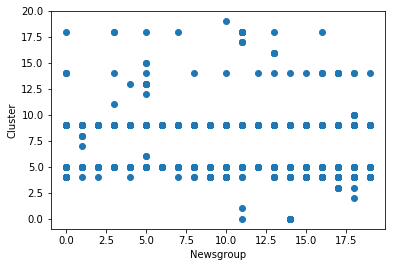

CPU times: user 448 ms, sys: 401 ms, total: 848 ms
Wall time: 1min 28s


In [13]:
%%time
# K Mean를 활용한 묶음처리
from sklearn.cluster import KMeans
km = KMeans(n_clusters=20, n_jobs=-1)
km.fit(transformed)

labels = groups.target
plt.scatter(labels, km.labels_)
plt.xlabel('Newsgroup'); plt.ylabel('Cluster')
plt.show()

### **03 Topic 모델링**
1. 문장 내 단어 Token중 **핵심(주제)가 되는 Token을** 선별한다
1. Topic 마다 **다른 가중치를 할당하여 additive model을** 정의한다
1. **비음수 행렬 인수분해** : Non-Negative Matrix Factorization

In [14]:
%%time
from sklearn.decomposition import NMF
nmf = NMF(n_components=100, random_state=43).fit(transformed)

for topic_idx, topic in enumerate(nmf.components_):
    label = '{}: '.format(topic_idx)
    print(label, " ".join([cv.get_feature_names()[i]
                           for i in topic.argsort()[:-9:-1]]))

0:  wa thought later took left order seen taken
1:  db bit data place stuff add time line
2:  server using display screen support code mouse application
3:  file section information write source change entry number
4:  disk drive hard controller support card board head
5:  entry rule program source number info email build
6:  new york sale change service result study early
7:  image software user package using display include support
8:  window manager application using offer user information course
9:  gun united control house american second national issue
10:  hockey league team game division player list san
11:  turkish government sent war study came american world
12:  program change technology display information version application rate
13:  space nasa technology service national international small communication
14:  government political federal sure free private local country
15:  output line open write read return build section
16:  people country doing tell live killed lot s